In [1]:
# http://www.spectralpython.net/graphics.html
from skimage.filters import threshold_multiotsu
import pysptools.abundance_maps as amp
import matplotlib.pyplot as plt
import spectral.io.envi as envi
import pysptools.util as util
import pysptools.eea as eea
from spectral import imshow
from pathlib import Path
from osgeo import gdal
import numpy as np
import os

In [2]:
image = gdal.Open(r"C:\Users\nicom\Desktop\MAESTRIA\Maestria_semestre_2\Remote_sensing\remote-sensing\HYPERION\EO1H0150332013171110KF_REF.dat")
bands, xSize, ySize = image.RasterCount, image.RasterXSize, image.RasterYSize
print(f"Image loaded: # Ráster {bands}, {xSize}, {ySize}")

Image loaded: # Ráster 242, 256, 3177


In [3]:
complete_img = np.dstack([image.GetRasterBand(band).ReadAsArray() for band in range(1,bands+1)])

In [4]:
result_path = r"C:\Users\nicom\Desktop\MAESTRIA\Maestria_semestre_2\Remote_sensing\Actividad 3\results\hyperion"

In [5]:
cutted = complete_img[1700:2000, :, :]

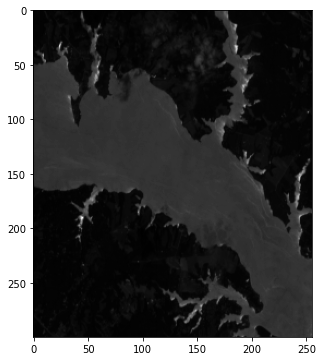

In [6]:
plt.figure(figsize=(5, 30))
plt.imshow(cutted[:, :, 24], cmap=plt.cm.gray)

In [7]:
# thresholds = threshold_multiotsu(cutted[:, :, 24]) # Se usó la capa de infrarojo
thresholds = [1589, 4051]

In [8]:
# Using the threshold values, we generate the three regions.
classification_map = np.digitize(cutted[:, :, 24], bins=thresholds)

(-0.5, 255.5, 299.5, -0.5)

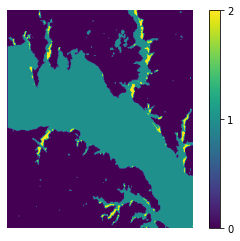

In [9]:
bars = plt.imshow(classification_map, cmap='viridis')
color_bar = plt.colorbar(bars, ticks=range(3))
plt.axis('off')

In [10]:
print('Endmembers extraction with NFINDR')
nfindr = eea.NFINDR()
U = nfindr.extract(cutted, 3, maxit=5, normalize=True, ATGP_init=True)
nfindr.plot(result_path)

Endmembers extraction with NFINDR


In [11]:
print('Abundance maps generation with NNLS')
nnls = amp.NNLS()
amaps = nnls.map(cutted, U, normalize=True)
nnls.plot(result_path, colorMap='jet', suffix='nfindr')

Abundance maps generation with NNLS


<Figure size 432x288 with 0 Axes>

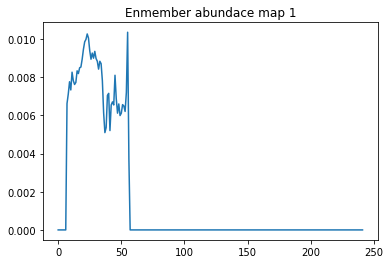

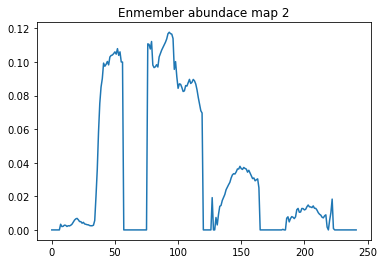

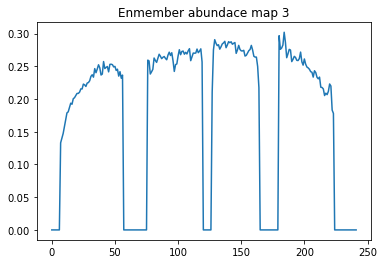

In [16]:
for n, i in enumerate(U):
    plt.plot(range(len(i)),i)
    plt.title(f"Enmember abundace map {n + 1}")
    plt.savefig(f"{result_path}/signature {n + 1}.png")
    plt.show()